# Table of Contents

[Questionnaire only](#Questionnaire-only)
  - [Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?](#Can-the-answers-to-the-scientific-questions-be-used-to-predict-if-the-questionnaire-was-filled-before-or-after-the-game?)
    - [If scientific questions are coded by answers](#If-scientific-questions-are-coded-by-answers)
    - [If scientific questions are coded by correctedness](#If-scientific-questions-are-coded-by-correctedness)
[RedMetrics only](#RedMetrics-only)
  - [Can the score of a player be predicted with their RedMetrics data](#Can-the-score-of-a-player-be-predicted-with-their-RedMetrics-data)

[Questionnaire and RedMetrics](#Questionnaire-and-RedMetrics)
  - [Can the biology level of a player be predicted using the game data?](#Can-the-biology-level-of-a-player-be-predicted-using-the-game-data?)
  - [Can the gaming profile of a player be predicted using the game data?](#Can-the-gaming-profile-of-a-player-be-predicted-using-the-game-data?)
  - [Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly](#Can-the-completion-time-of-each-chapter-be-used-to-predict-if-a-player-is-going-to-answer-a-specific-scientific-question-correctly)
  - [Can the game data be used to predict the performance on a sub-group of scientific questions?](#Can-the-game-data-be-used-to-predict-the-performance-on-a-sub-group-of-scientific-questions?)
    - [Using an arbitrary classification of questions](#Using-an-arbitrary-classification-of-questions)
      - [Hard questions](#Hard-questions)
      - [Biobrick symbol recognition](#Biobrick-symbol-recognition)
      - [Easy questions](#Easy-questions)
    - [Using Bloom's taxonomy](#Using-Bloom's-taxonomy)
      - [knowledge questions](#knowledge-questions)
      - [comprehension questions](#comprehension-questions)
      - [application questions](#application-questions)
      - [analysis questions](#analysis-questions)
      - [synthesis questions](#synthesis-questions)
  - [Can the completion time be predicted from questionnaire answers?](#Can-the-completion-time-be-predicted-from-questionnaire-answers?)
    - [From the before questionnaire](#From-the-before-questionnaire)
    - [From the after questionnaire](#From-the-after-questionnaire)

In [1]:
%run dataFormating.ipynb

rmdfTestUsers read_csv success (1/3)
rmdf1522 read_csv success (2/3)
rmdf160 read_csv success (3/3)
gform read_csv success
gformFR read_csv success
temporalities set (user answer method)


IntProgress(value=0, max=1708)

IntProgress(value=0, max=854)

profile info set
t test: statistic=0.44942302738150924 pvalue=0.6535321184726215
t test: statistic=-0.1969960360612056 pvalue=0.8439549239305393
t test: statistic=-0.8852450320296444 pvalue=0.37654209947548145


FloatProgress(value=0.0, max=621.0)

dataFormating.ipynb:9: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  "outputs": [
dataFormating.ipynb:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  "outputs": [


In [2]:
import sklearn
print (sklearn.__version__)

0.19.1


In [3]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [4]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [5]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.8564814814814815

In [6]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9212962962962963

In [7]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9074074074074074

Conclusion: Accuracy is around 85%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [8]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [9]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.9206349206349206

In [10]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9563492063492062

In [11]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9484126984126983

Conclusion: Accuracy is around 80%. Not bad but we expected better (19/12/2017)

# RedMetrics only

In [12]:
allDataClassif.columns

Index([ 'sessionsCount',   'scorepretest',  'scoreposttest', 'scoreundefined',
             'complete',      'configure',          'craft',          'death',
                'equip',        'unequip',            'add',         'remove',
              'gotourl',         'pickup',          'reach',        'restart',
           'selectmenu',          'start',     'maxChapter',     'efficiency',
         'thoroughness',            'fun', 'completionTime',                0,
                      1,                2,                3,                4,
                      5,                6,                7,                8,
                      9,               10,               11,               12,
                     13,               14,    'anonymousID'],
      dtype='object')

## Can the score of a player be predicted with their RedMetrics data

In [13]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0].drop("scoreposttest", axis = 1)
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([ 0.38734439,  0.35547422,  0.22226266,  0.34926362,  0.1775114 ,
        0.32995753,  0.32080801,  0.24895932, -0.15065389,  0.02063208])

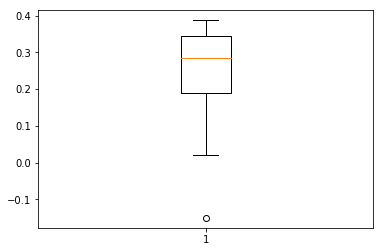

In [14]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data (30/01/2018)

In [15]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0].drop("scoreposttest", axis = 1)
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([ 0.3814834 ,  0.36318947,  0.19623211,  0.34008968,  0.19953215,
        0.32658754,  0.32612501,  0.27627436, -0.16929943, -0.00926032])

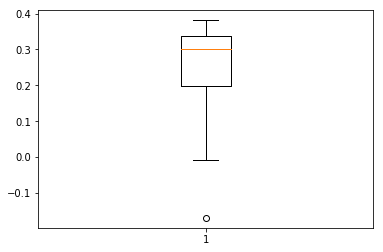

In [16]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

In [17]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]
features = features[["craft", "death", "add", "remove", "reach", "maxChapter"] + list(range(15))]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([ 0.29406717,  0.30875647,  0.0625392 ,  0.26387169,  0.12544653,
        0.27555917,  0.29747092,  0.19396457, -0.33408368, -0.05647366])

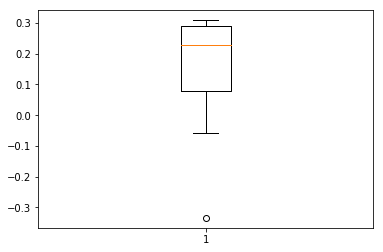

In [18]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Tried different combinations, but cannot find any interesting regression (02/02/2018)

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [19]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]
features = features.loc[:,"sessionsCount":"completionTime"]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([-7.54828433e-02, -2.60318809e-01, -3.58352892e-02, -1.27990098e+00,
       -6.31793969e-01, -1.24716109e-01, -4.24168975e-03, -5.07707598e-02,
       -5.13244460e-01, -1.10352904e-03])

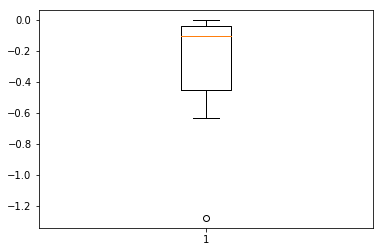

In [20]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [21]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData.loc[:,"sessionsCount":"completionTime"]
target = sum(anonymousData["gameInterest"], anonymousData["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([-8.72789009e-03, -3.19017570e-02, -3.61235227e-04, -4.31011923e-01,
       -5.93004313e-02, -3.61235227e-04, -8.27419426e-02, -1.08546219e-01,
       -2.35774342e-01, -1.08546219e-01])

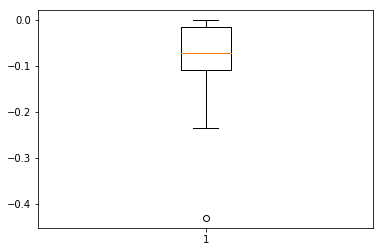

In [22]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly

In [23]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreposttest"] >= 0]
    features = features.iloc[:,24:37]
    target = anonymousData[anonymousData["scoreposttest"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: Use

C:\Users\Mikael\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mikael\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

,QGenotypePhenotype,QBioBricksDevicesComposition,QAmpicillin,QBBNamePlasmid,QBBFunctionTER,QBBNamePromoter,QBBFunctionGameCDS,QBBNameTerminator,QBBFunctionBiologyCDS,QBBNameRBS,...,QDevicePconsRbsFlhdcTer,QDevicePbadRbsGfpTer,QDevicePbadGfpTbsTer,QDeviceGfpRbsPconsTer,QDevicePconsGfpRbsTer,QDeviceAmprRbsPconsTer,QDeviceRbsPconsAmprTer,QGreenFluorescence,QUnequipDevice,QDevicePbadRbsAraTer
Mean,0.747256,0.668769,0.587692,0.676282,0.637718,0.715385,0.809231,0.562462,0.794231,0.873231,...,0.635154,0.737846,0.770154,0.752436,0.770154,0.800795,0.769231,0.554487,0.600641,0.873231
Var,0.067512,0.093545,0.035298,0.077402,0.106800,0.045662,0.040260,0.062807,0.024359,0.013538,...,0.106449,0.112456,0.067437,0.063373,0.080423,0.045793,0.041464,0.063974,0.090419,0.028693


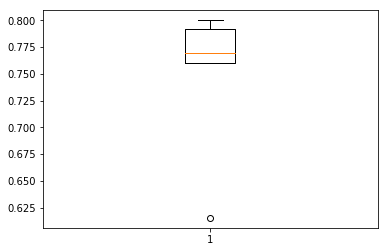

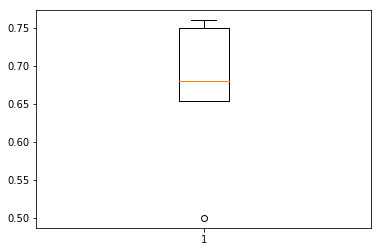

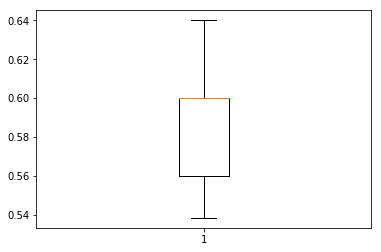

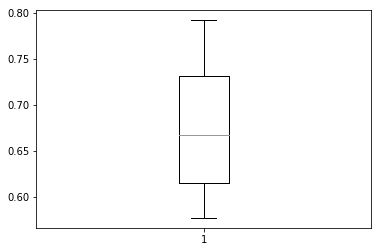

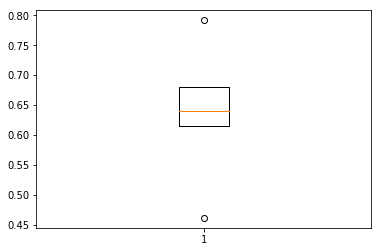

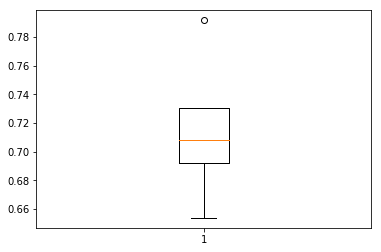

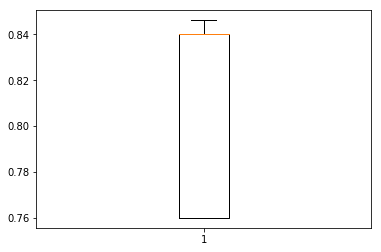

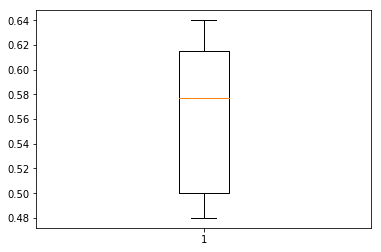

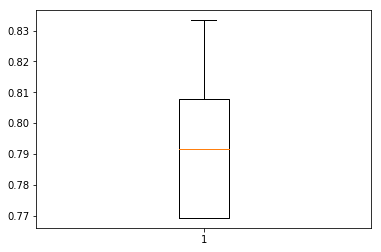

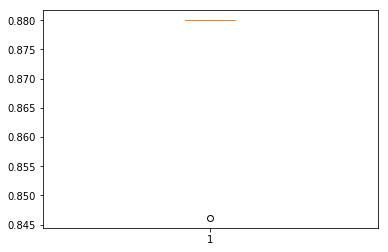

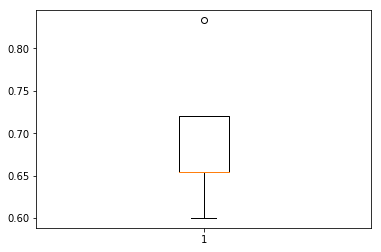

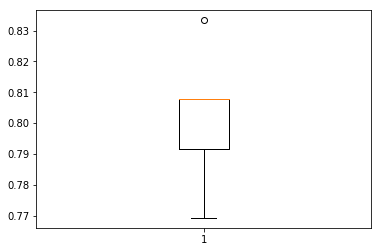

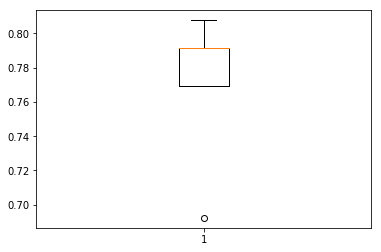

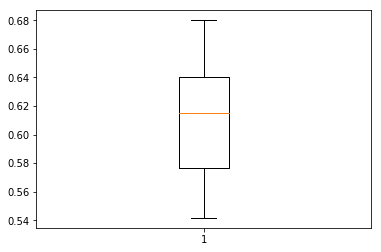

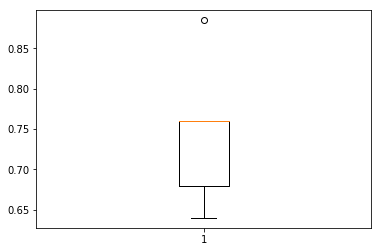

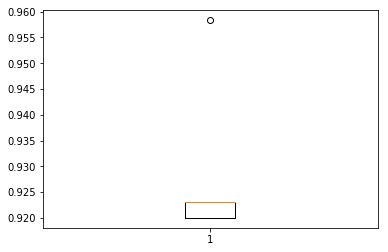

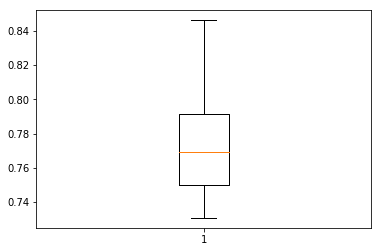

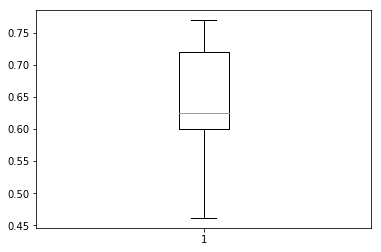

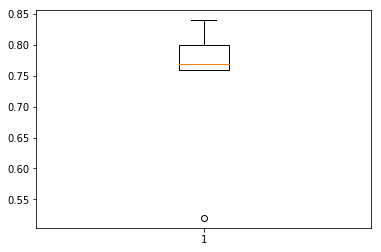

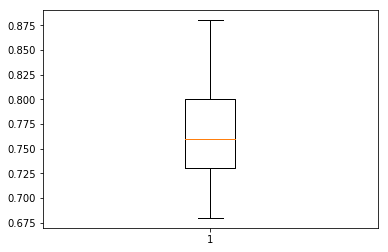

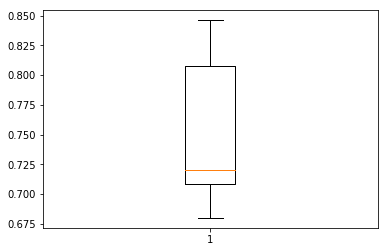

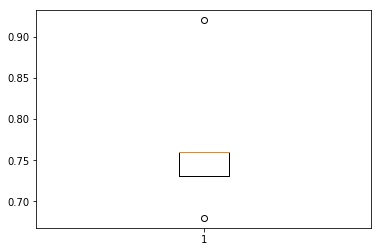

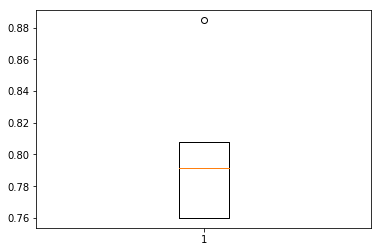

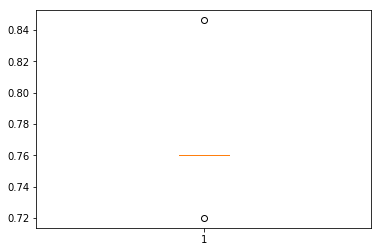

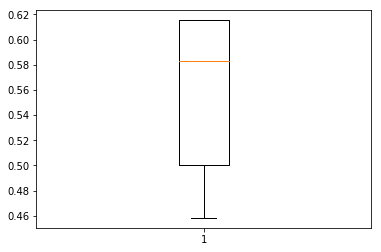

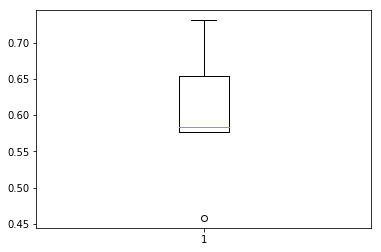

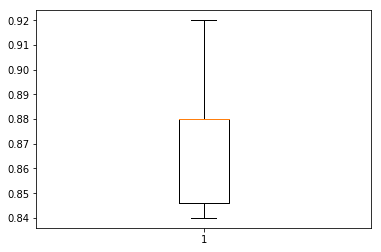

In [24]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for question in ["QGenotypePhenotype", "QBioBricksDevicesComposition", "QAmpicillin", "QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator", "QDeviceRbsPconsFlhdcTer", "QDevicePconsRbsFlhdcTer", "QDevicePbadRbsGfpTer", "QDevicePbadGfpTbsTer", "QDeviceGfpRbsPconsTer", "QDevicePconsGfpRbsTer", "QDeviceAmprRbsPconsTer", "QDeviceRbsPconsAmprTer", "QGreenFluorescence", "QUnequipDevice", "QDevicePbadRbsAraTer"]:
    questionTag = question
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (29/05/2018)
TODO Raphael: Check which questions you want additional analysis for

## Can the game data be used to predict the performance on a sub-group of scientific questions?

In [60]:
def getBoxplot(scores, title = ''):
    # figure related code
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(scores)
    ax.set_title(title)

In [66]:
# boxplot function
#  questions: array of strings of question names
def getPerformanceFromQuestionGroup(questions,
                                    exclusive = False,
                                    extraTreesClassifier = False,
                                    randomForestClassifier = False,
                                    lasso = False,
                                    histTarget = 0
                                   ):
    # Remove id
    anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

    # Get features and target
    features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1)
    target = anonymousData.loc[:, questions].astype(int).sum(axis=1)
    if exclusive:
        target = target.apply(lambda x: 0 if x < len(questions) else 1)

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)

    if extraTreesClassifier:
        # Classify using extra tree classifiers, more random than random forest methods
        clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, target, cv=10)
        print("ExtraTreesClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "ExtraTreesClassifier boxplot")
        
    if randomForestClassifier:
        # Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
        clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, target)
        print("RandomForestClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "RandomForestClassifier boxplot")
        
    if lasso:
        # Run Lasso regression with cross-validation
        model = Lasso()
        scores = cross_val_score(model, features, target, cv=10)
        print("Lasso scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "Lasso boxplot")
        
    if histTarget > 0:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.hist(target, bins = range(histTarget))

### Using an arbitrary classification of questions

#### Hard questions

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


ExtraTreesClassifier scores mean: 1.0
RandomForestClassifier scores mean: 1.0


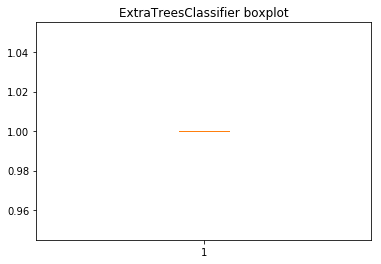

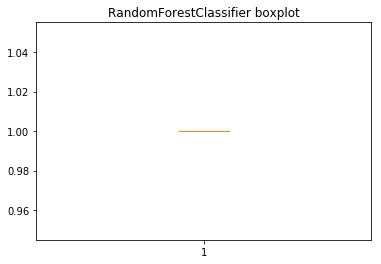

In [67]:
hardQuestions = ["QBBFunctionPR", "QBBNameOperator", "QDevicePbadRbsAraTer"]
getPerformanceFromQuestionGroup(hardQuestions, exclusive = True, extraTreesClassifier = True, randomForestClassifier = True)

Conclusion: Very high quality prediction (29/05/18)

### Biobrick symbol recognition

Lasso scores mean: 0.5945437179903345


C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


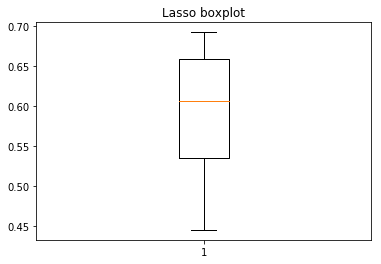

In [68]:
bbSymbolRecognition = ["QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator"]
getPerformanceFromQuestionGroup(bbSymbolRecognition, lasso = True)

Conclusion: No apparent possible prediction (1/02/2018)

### Easy questions

Lasso scores mean: -0.23768933464830147


C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


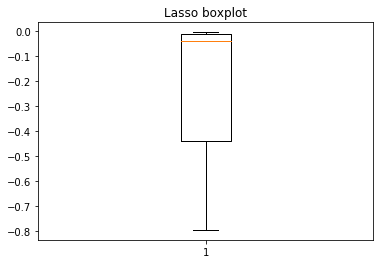

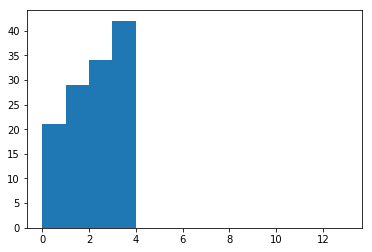

In [69]:
easyQuestions = ["QBioBricksDevicesComposition", "QDeviceRbsPconsFlhdcTer", "QGreenFluorescence"]
getPerformanceFromQuestionGroup(easyQuestions, lasso = True, histTarget = 14)

Conclusion: Inconclusive (01/02/2018)

### Using Bloom's taxonomy

Not interpreted yet.

#### knowledge questions

Lasso scores mean: 0.01818468271267093


C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


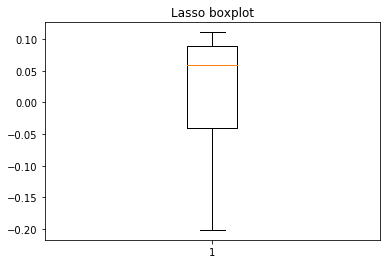

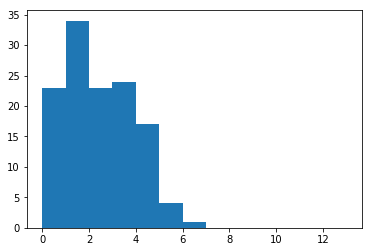

In [70]:
knowledgeQuestions = ["QAmpicillin",
                      "QBBNamePlasmid",
                      "QBBNamePromoter",                      
                      "QBBNameTerminator",
                      "QBBNameRBS",
                      "QBBNameCDS",
                      "QBBNameOperator",
                     ]
getPerformanceFromQuestionGroup(knowledgeQuestions, lasso = True, histTarget = 14)

#### comprehension questions

Lasso scores mean: 0.06717809657136598


C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


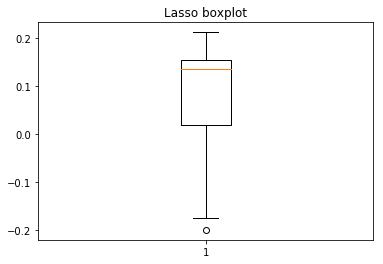

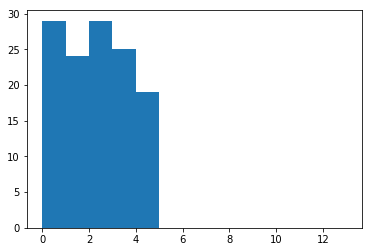

In [71]:
comprehensionQuestions = ["QBioBricksDevicesComposition",
                      "QBBFunctionTER",
                      "QBBFunctionPlasmid",                      
                      "QUnequipDevice",
                     ]
getPerformanceFromQuestionGroup(comprehensionQuestions, lasso = True, histTarget = 14)

#### application questions

Lasso scores mean: -0.2759909100138486


C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


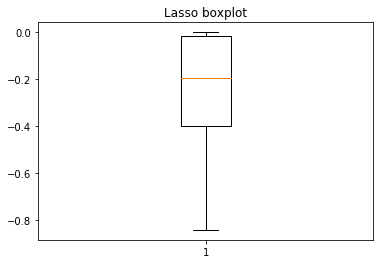

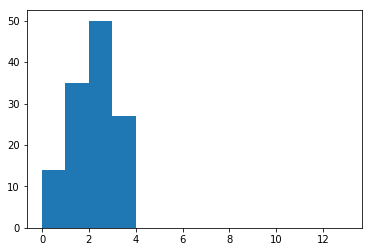

In [72]:
applicationQuestions = ["QGenotypePhenotype",
                      "QBBExampleCDS",
                      "QGreenFluorescence",
                     ]
getPerformanceFromQuestionGroup(applicationQuestions, lasso = True, histTarget = 14)

#### analysis questions

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Lasso scores mean: -0.12911558127977388


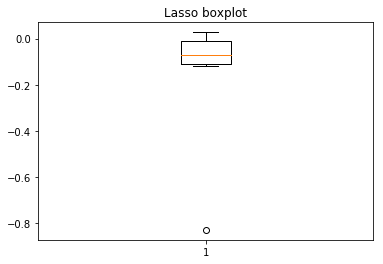

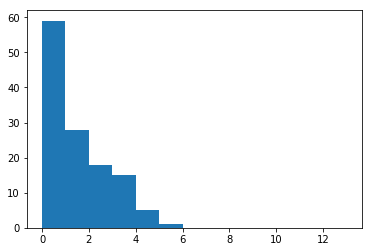

In [73]:
analysisQuestions = ["QBBFunctionGameCDS",
                      "QBBFunctionBiologyCDS",
                      "QBBFunctionPR",
                      "QBBFunctionRBS",
                      "QDevicePbadRbsAraTer",
                     ]
getPerformanceFromQuestionGroup(analysisQuestions, lasso = True, histTarget = 14)

#### synthesis questions

C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Lasso scores mean: 0.6392131096314156


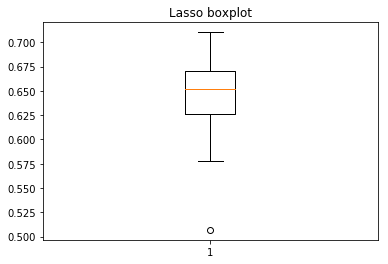

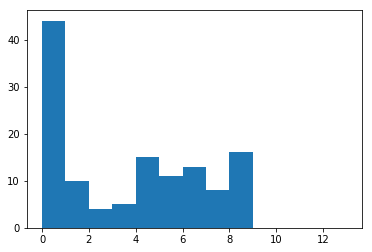

In [74]:
synthesisQuestions = ["QDeviceRbsPconsFlhdcTer",
                      "QDevicePconsRbsFlhdcTer",
                      "QDevicePbadRbsGfpTer",                      
                      "QDevicePbadGfpTbsTer",
                      "QDeviceGfpRbsPconsTer",
                      "QDevicePconsGfpRbsTer",
                      "QDeviceAmprRbsPconsTer",
                      "QDeviceRbsPconsAmprTer",
                     ]
getPerformanceFromQuestionGroup(synthesisQuestions, lasso = True, histTarget = 14)

## Can the completion time be predicted from questionnaire answers?

### From the before questionnaire

In [32]:
# Remove id
anonymousData = gameAndCorrectedBeforeDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-0.3915524677477815

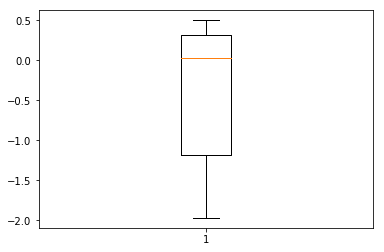

In [33]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=10000, alpha=10)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.7619047619047619

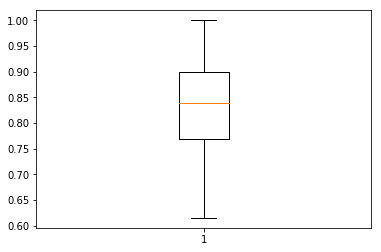

In [34]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()
sum(target)/len(target)

Conclusion: No (01/02/2018)

### From the after questionnaire

In [35]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

0.004601070055313694

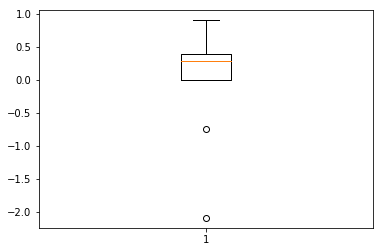

In [36]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=1000000)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.8339743589743589

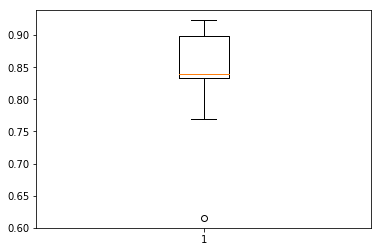

In [37]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: Yes (29/05/18)

In [38]:
sum(target)

96

In [39]:
len(target)

126

Conclusion: Yes but very unbalanced classes (29/05/18)